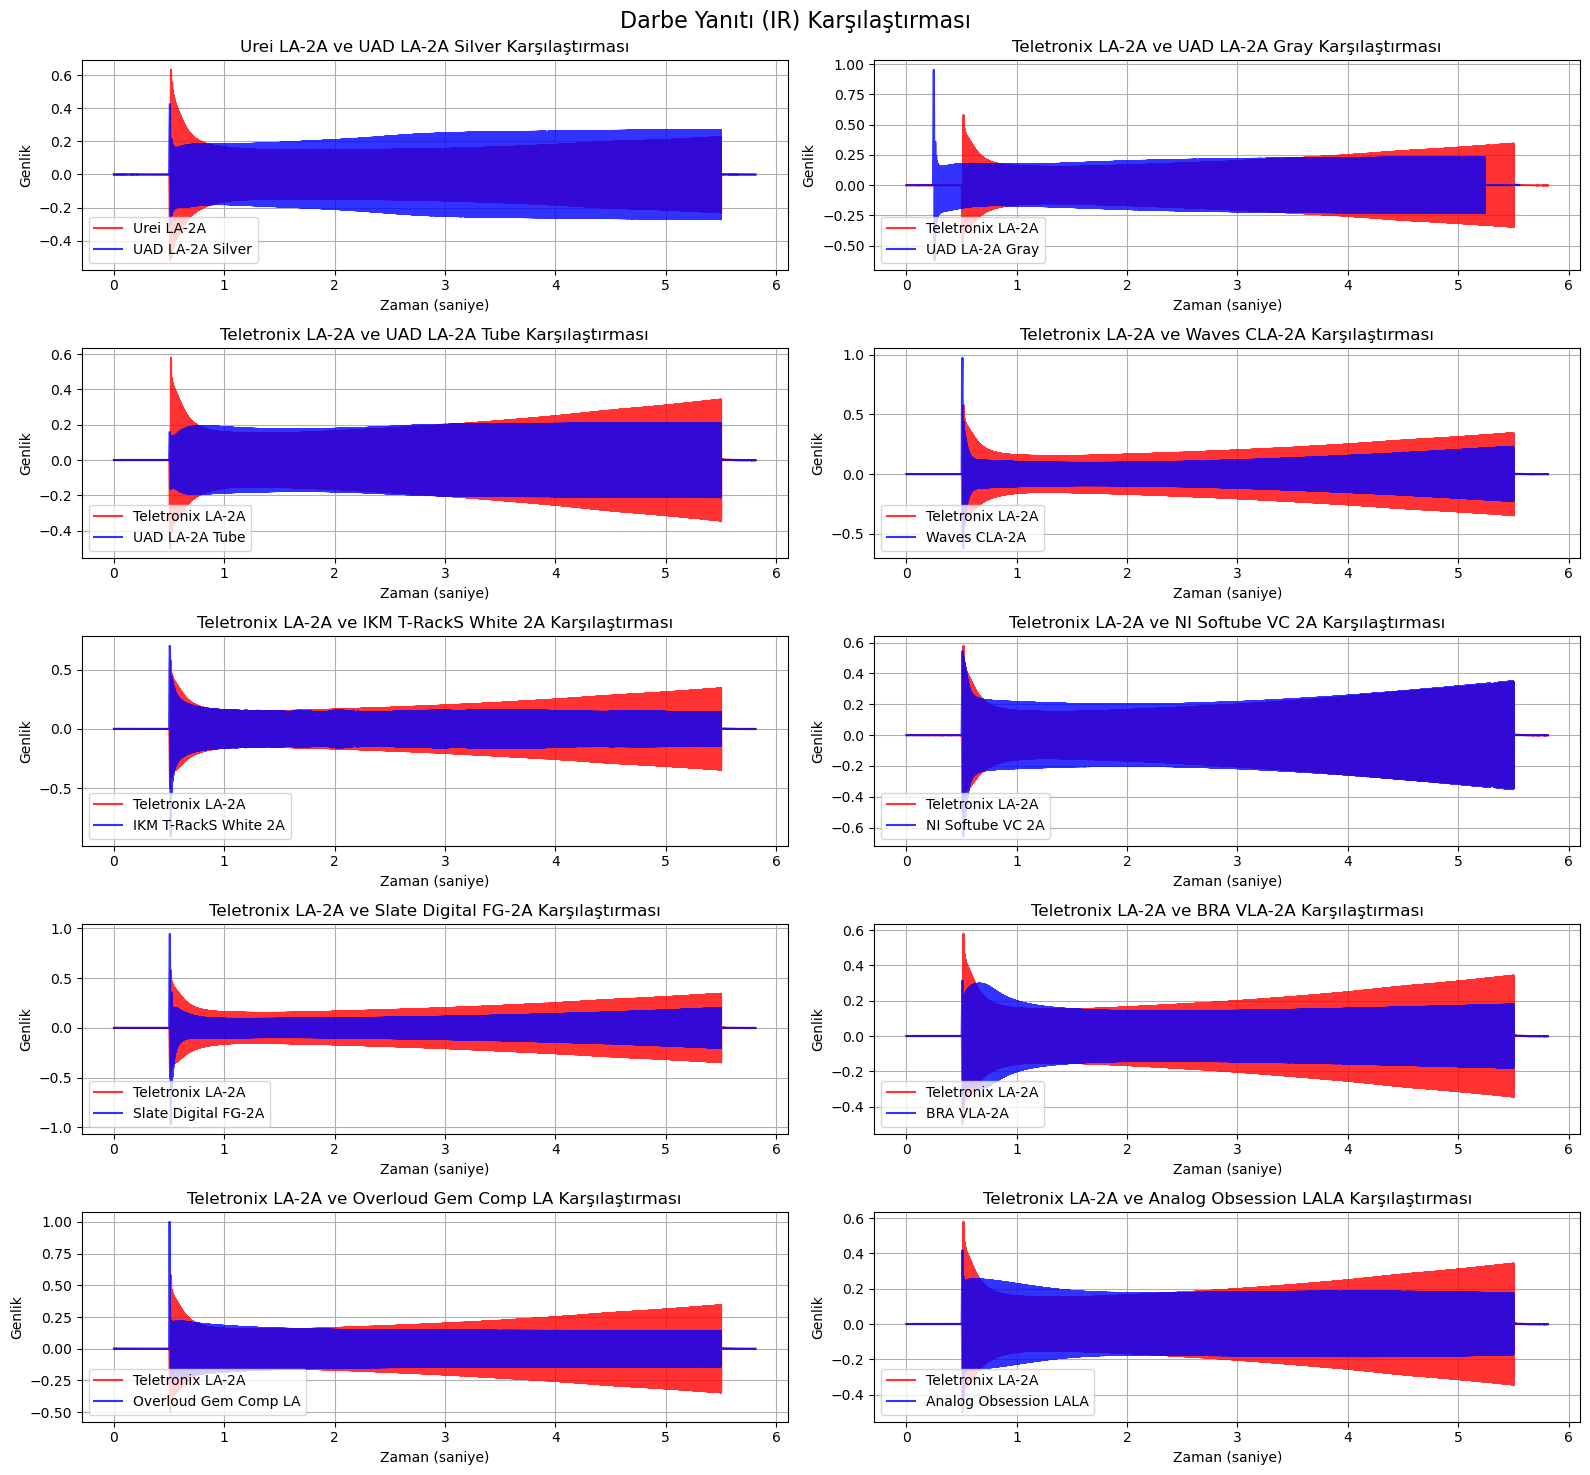

In [3]:
# farklı ses işleme cihazlarının darbe yanıtları (Impulse Responses - IR) veya zaman bağlamındaki davranışları analiz ediliyor.

# Sweep sinüs dalgası, frekans-tabanlı doğrusal olmayan distorsiyonları ve zamansal tepkileri analiz etmede en etkili test sinyalidir.
# Sweep sinüs dalgası, yüksek sinyal-gürültü oranı sağlar ve IR analizinde gürültü kaynaklı bozulmaları minimize eder.

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/processed/teletronix_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/urei_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_gray_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_silver_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_tube_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/waves_cla-2a_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ikm_white-2a_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ni_softube_vc-2a_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ss_fg-2a_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/bra_vla-2a_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/overloud_gem-comp-la_linear_sweep_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ao_lala_linear_sweep_sine.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Referans ses dosyalarını yükleme
teletronix, sr1 = librosa.load(audio_files[0], sr=None)
urei, sr_urei = librosa.load(audio_files[1], sr=None)
uad_silver, sr_silver = librosa.load(audio_files[3], sr=None)

# Zaman eksenleri oluşturma
time_teletronix = np.linspace(0, len(teletronix) / sr1, len(teletronix))
time_urei = np.linspace(0, len(urei) / sr_urei, len(urei))
time_silver = np.linspace(0, len(uad_silver) / sr_silver, len(uad_silver))

# Toplam grafik sayısını belirleme
num_graphs = 10  # 1 Urei-Silver + 9 Teletronix ile diğerleri

# Grafik düzenleme ayarları
rows = (num_graphs + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, 3 * rows))
axes = axes.flatten()

# Grafik sırasını takip etmek için bir sayaç
plot_idx = 0

# Urei LA-2A ve UAD LA-2A Silver karşılaştırması
axes[plot_idx].plot(time_urei, urei, label=audio_labels[1], alpha=0.8, color="red")  # Urei kırmızı
axes[plot_idx].plot(time_silver, uad_silver, label=audio_labels[3], alpha=0.8, color="blue")  # Silver mavi
axes[plot_idx].set_title(f"{audio_labels[1]} ve {audio_labels[3]} Karşılaştırması")
axes[plot_idx].set_xlabel("Zaman (saniye„)")
axes[plot_idx].set_ylabel("Genlik")
axes[plot_idx].legend()
axes[plot_idx].legend(loc='lower left')  # Efsaneyi sağ üst köşeye sabitler
axes[plot_idx].grid()
plot_idx += 1  # Bir sonraki grafik için sayaç artırılır

# Teletronix LA-2A ile diğer dosyaların karşılaştırılması (Urei ve Silver hariç)
for idx, file in enumerate(audio_files[2:], start=2):  # İlk 2 dosya hariç
    if idx == 3:  # UAD Silver zaten karşılaştırıldı
        continue

    y_other, sr_other = librosa.load(file, sr=None)
    time_other = np.linspace(0, len(y_other) / sr_other, len(y_other))

    axes[plot_idx].plot(time_teletronix, teletronix, label=audio_labels[0], alpha=0.8, color="red")  # Teletronix kırmızı
    axes[plot_idx].plot(time_other, y_other, label=audio_labels[idx], alpha=0.8, color="blue")  # Diğer plugin mavi
    axes[plot_idx].set_title(f"{audio_labels[0]} ve {audio_labels[idx]} Karşılaştırması")
    axes[plot_idx].set_xlabel("Zaman (saniye)")
    axes[plot_idx].set_ylabel("Genlik")
    axes[plot_idx].legend()
    axes[plot_idx].legend(loc='lower left')
    axes[plot_idx].grid()
    plot_idx += 1  # Bir sonraki grafik için sayaç artırılır

# Kullanılmayan alt grafiklerin gizlenmesi
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Darbe Yanıtı (IR) Karşılaştırması", fontsize=16)
plt.show()
